First 5 rows of data:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


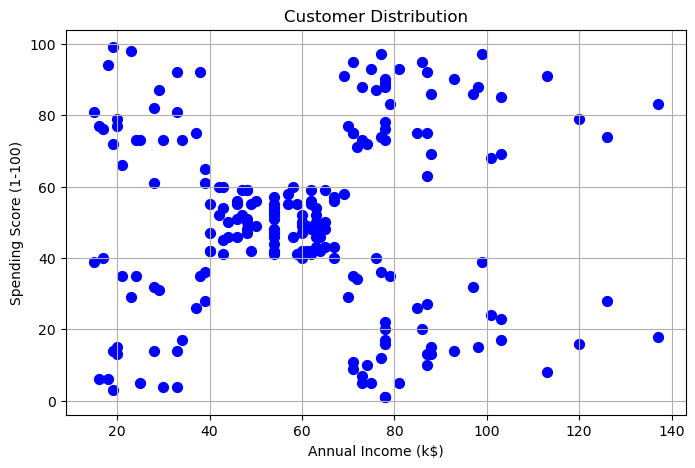

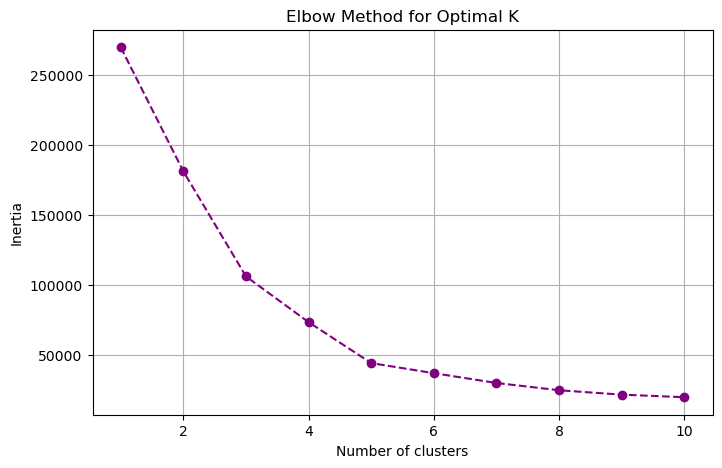

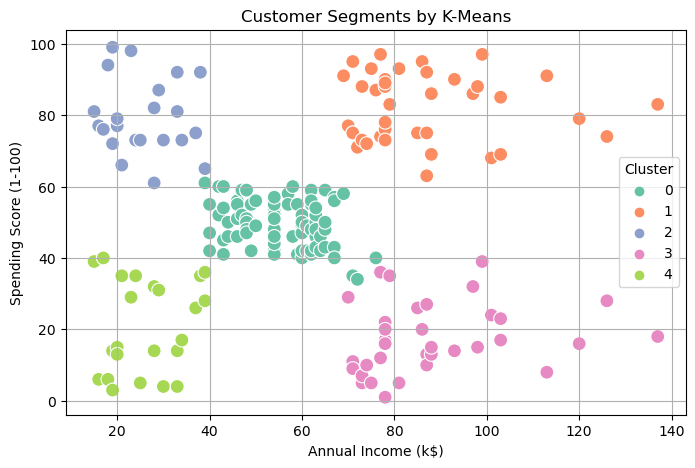

Silhouette Score for K=5: 0.55


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

os.environ['OMP_NUM_THREADS'] = '1'

data = pd.read_csv(r"C:\Users\asus\Downloads\archive (8)\Mall_Customers.csv")
print("First 5 rows of data:\n", data.head())

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.figure(figsize=(8,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue', s=50)
plt.title("Customer Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # fix FutureWarning
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='purple')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments by K-Means")
plt.grid(True)
plt.show()

score = silhouette_score(X, data['Cluster'])
print(f"Silhouette Score for K={optimal_k}: {score:.2f}")